In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algeria_clean_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,57,18
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,61,13
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,82,22
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,89,13
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,77,16


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', ' RH', ' Ws'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,57,18
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,61,13
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,82,22
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,89,13
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,77,16


In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df['Classes']=df['Classes'].str.strip()

In [9]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [10]:
## features Encoding
df['Classes']=np.where(df['Classes']=='fire',1,0)

In [11]:
df[['Classes']][1:10]

,Classes
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [12]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [13]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', ' RH', ' Ws'],
      dtype='object')

In [14]:
## categories the independent and dependent features in the dataset
x=df.drop('FWI', axis=1)
y=df['FWI']

In [15]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,RH,Ws
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0,57,18
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0,61,13
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0,82,22
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,89,13
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0,77,16


In [16]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [17]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=42)

In [18]:
x_test.shape,x_train.shape,y_train.shape, y_test.shape 

((61, 13), (182, 13), (182,), (61,))

In [19]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,RH,Ws
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549,-0.656095,-0.305977
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665,1.000000,0.225736
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969,0.225736,1.000000
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022,0.241656,0.251932
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514,-0.653023,-0.190076
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582,-0.414601,0.000379
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838,-0.236078,0.096576
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441,-0.717804,-0.023558
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897,-0.362317,0.035633
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837,-0.456876,-0.082570


## Features Selection

<AxesSubplot: >

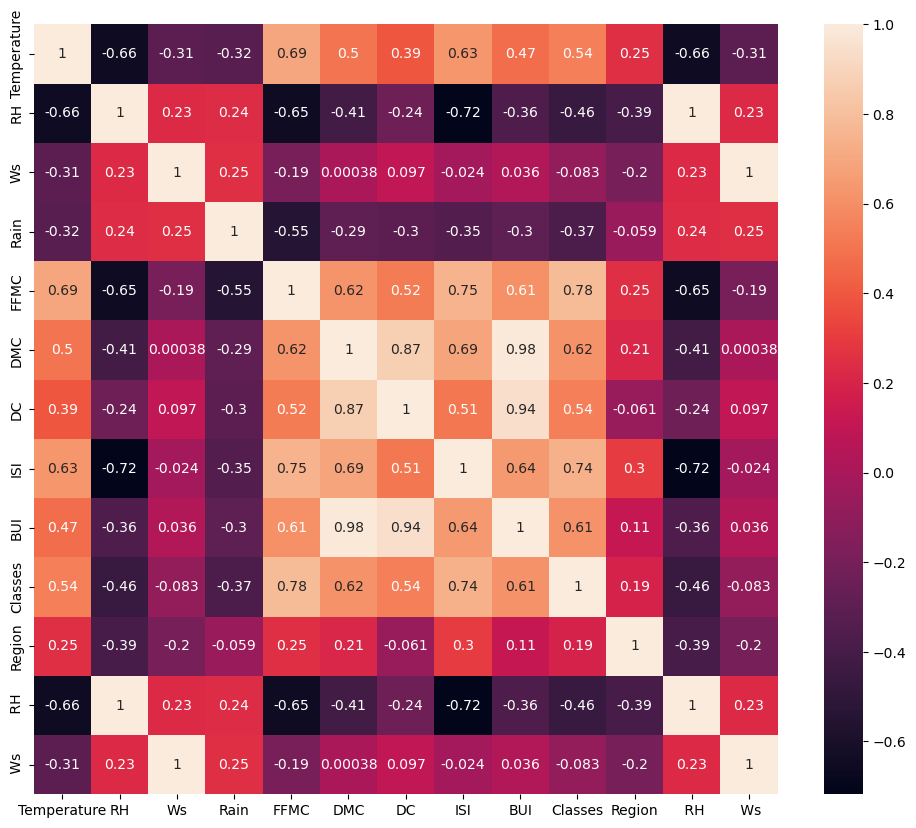

In [20]:
## Checking the multicollinearity 
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [21]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,RH,Ws
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549,-0.656095,-0.305977
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665,1.000000,0.225736
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969,0.225736,1.000000
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022,0.241656,0.251932
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514,-0.653023,-0.190076
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582,-0.414601,0.000379
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838,-0.236078,0.096576
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441,-0.717804,-0.023558
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897,-0.362317,0.035633
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837,-0.456876,-0.082570


In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
correlation(x_train, 0.85)

{' RH', ' Ws', 'BUI', 'DC'}

In [24]:
## drop fetures when correltion is more than 0.85
x_train.drop(['BUI','DC'] ,axis=1, inplace=True)


In [25]:
## Also from test dateset.
x_test.drop(['BUI','DC'],axis=1, inplace=True)

In [26]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region,RH,Ws
97,29,74.0,19.0,0.1,75.8,3.6,2.1,0,0,74,19
141,31,72.0,14.0,0.2,60.2,3.8,0.8,0,1,72,14
192,40,31.0,15.0,0.0,94.2,22.5,16.6,1,1,31,15
68,32,60.0,18.0,0.3,77.1,11.3,2.2,0,0,60,18
119,32,47.0,14.0,0.7,77.5,7.1,1.8,0,0,47,14


In [27]:
x_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region,RH,Ws
24,31,64.0,15.0,0.0,86.7,14.2,5.7,1,0,64,15
6,33,54.0,13.0,0.0,88.2,9.9,6.4,1,0,54,13
152,28,58.0,18.0,2.2,63.7,3.2,1.2,0,1,58,18
232,34,58.0,13.0,0.2,79.5,18.7,2.1,0,1,58,13
238,30,65.0,14.0,0.0,85.4,16.0,4.5,1,1,65,14


## Feature Scaling or Satandardization.

In [28]:
from sklearn.preprocessing import StandardScaler
obj_Std=StandardScaler()

In [29]:
x_train_scaled=obj_Std.fit_transform(x_train)

In [30]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.98907071,
         0.78307967,  1.29972026],
       [-0.30175842,  0.64950844, -0.59874754, ...,  1.01105006,
         0.64950844, -0.59874754],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  1.01105006,
        -2.08870172, -0.21905398],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -0.98907071,
         0.9166509 ,  0.54033314],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  1.01105006,
        -0.21870454,  0.16063958],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.98907071,
         0.98343651,  2.05910739]])

In [31]:
x_test_scaled=obj_Std.transform(x_test)

## Box plots To understand Effects of Standrd Scaler

/tmp/ipykernel_112/85897649.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after Scaling')

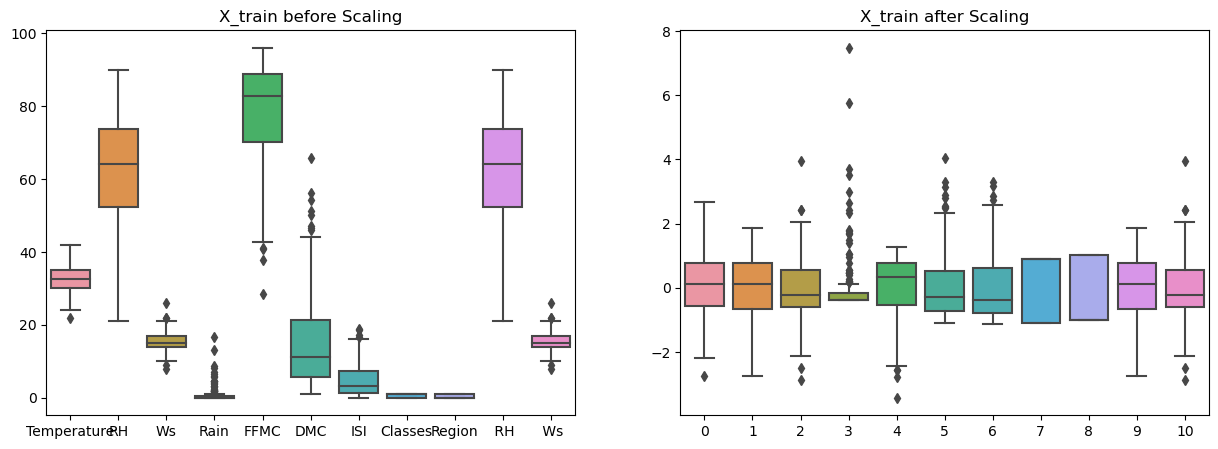

In [32]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train after Scaling')

## Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [34]:
Regressioon=LinearRegression()

In [35]:
Regressioon.fit(x_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred=Regressioon.predict(x_test_scaled)

In [37]:
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [38]:
## Mean absolute_error
mae=mean_absolute_error(y_test, y_pred)

In [39]:
mae

0.5468236465249977

In [40]:
score=r2_score(y_test,y_pred)

In [41]:
score

0.9847657384266952

## Ridge Regression Model

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [43]:
obj_ridge=Ridge()

In [44]:
obj_ridge.fit(x_train_scaled, y_train)

Ridge()

In [45]:
y_pred=obj_ridge.predict(x_test_scaled)

In [46]:
y_pred

array([ 8.23694244,  7.77176319, -0.20423784,  4.38642231,  6.72998259,
        1.37953123,  2.09746497,  7.8981655 ,  1.68582653,  3.39817213,
        0.45971505,  9.77182415,  9.35330137, 17.03192401, 18.46900914,
        1.31982897,  1.83401401, -0.13017999,  7.1847516 ,  3.15097136,
        1.43963924,  0.20475684,  6.60997489,  0.34732593, 20.97725741,
        5.22816013,  5.97095913,  9.82577719, -0.18186428,  9.83656685,
        6.64913251, -0.43212568, 10.41005273, 14.57507941,  1.52278253,
        0.4779589 ,  2.0957823 ,  6.1871944 , -0.51824371, -0.27048454,
        6.74772497,  1.81206646,  8.60374882, -0.34731884, 15.41486173,
        8.34113654,  8.27598163,  1.41859831, 12.97793614,  1.25013421,
       29.41059894,  5.66258306, 17.23956985, 19.38640465, 13.82281288,
       16.19129781,  0.70444299,  9.05109358,  3.6750258 , 14.63361457,
        5.27120014])

In [47]:
mae=mean_absolute_error(y_test, y_pred)

In [48]:
mae

0.5644312370166795

In [49]:
score=r2_score(y_test, y_pred)

In [50]:
score

0.9842938104740558

## Elasticnet Regression 

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [52]:
obj_elastic=ElasticNet()

In [53]:
obj_elastic.fit(x_train_scaled, y_train)

ElasticNet()

In [54]:
y_pred=obj_elastic.predict(x_test_scaled)

In [55]:
y_pred

array([ 8.40913932,  8.5244732 ,  1.72834275,  5.79293812,  7.98316359,
        3.80374587,  4.57408757, 10.06354767,  2.32282408,  4.57599566,
        1.64206432,  9.35362338, 10.02457564, 14.81832755, 14.95652562,
        3.97227571,  3.25769083, -1.09059231,  7.50267313,  6.46669017,
        2.60406603,  0.69931536,  7.73296725,  1.08750027, 17.1284118 ,
        8.2047355 ,  7.08585554,  9.6622457 , -1.63158355,  9.9543658 ,
        6.59080842,  1.92704445,  9.62278423, 12.52952891,  3.32746888,
        3.00943474,  4.13421247,  8.61274541, -0.16084707, -0.31922952,
        8.11629262,  3.70077439,  9.07930028, -1.12547069, 14.07242472,
        8.38344556,  8.46440725,  2.37139334, 12.17903115,  2.19016871,
       22.56146478,  8.49935051, 14.28618625, 15.31359777, 12.01597198,
       13.16840312,  3.31755019,  9.63313088,  5.89323688, 13.97563185,
        7.45936877])

In [56]:
mae=mean_absolute_error(y_test, y_pred)

In [57]:
mae

1.9035078397187801

In [58]:
score=r2_score(y_test, y_pred)

In [59]:
score

0.873081034642296

In [63]:
import pickle
pickle.dump(x_train_scaled, open('scaler.pkl','wb'))
pickle.dump(obj_ridge, open('rigdge.pkl','wb'))